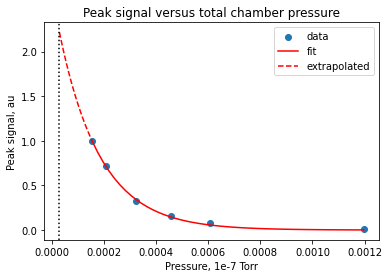

array([2.67068967e+00, 6.36060587e+03])

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
def signal(p,S,gamma):
  return S*np.exp(-gamma*p)
P0=2.2

#convert helium pressure to correct value because of gauge sensitivity
PArr=np.asarray([3.9,4.6,6.2,8.0,10.0,18])
PArr=(PArr-P0)/.18
#add baseline back
PArr=PArr+P0

PArr*=1e-7*133
P0*=1e-7*133

fwhmList=[]
peakSigArr=np.asarray([4650,3341,1492,721,359,68])
peakSigArr=peakSigArr/peakSigArr.max()

PDense=np.linspace(PArr.min(),PArr.max())
guess=[2.5,.1]
params=guess
params=spo.curve_fit(signal,PArr,peakSigArr,p0=guess)[0]

PExtrapole=np.linspace(P0,PArr.min())


fig, ax = plt.subplots()
plt.title('Peak signal versus total chamber pressure')
# plt.grid()
plt.xlabel('Pressure, 1e-7 Torr')
plt.ylabel('Peak signal, au')
ax.scatter(PArr,peakSigArr,label='data')
ax.plot(PDense,signal(PDense,*params),c='red',label='fit')
ax.plot(PExtrapole,signal(PExtrapole,*params),c='red',linestyle='--',label='extrapolated')

plt.axvline(x=P0,c='black',linestyle=':')
# plt.text(P0+2,.1,'No He flow')

# plt.annotate('No He bleeding',(PArr[0],1),xytext=((30,1)),arrowprops=dict(facecolor='black'))
plt.legend()
plt.savefig('signalVersusPressure.png')
plt.show()
signal(PArr[0],*params)
params

In [13]:
2*.15*160/(4*100_000),1.5/300

(0.00012, 0.005)

In [123]:
#estimating the cross section
mu=params[1] #mu=n*sigma*L/P=sigma*L/(k*T). from my fit compared to Beer's law

kb=1.38e-23
T=295
L=1.7 #total length of system

# #mu has units of 1/(1e-7 Torr). Need to convert to SI
# #convert from 1e-7 Torr to Torr
#convert from torr to Pa
# mu=mu*(1/(133*1e-7))



sigma=mu*kb*T/L
#convert to cm^2
sigma=sigma*1e4
sigma

1.523178030329043e-13

In [65]:
mu=sigma*1.7*(101325*(2e-6/760))/(kb*T)
2.67*np.exp(-mu)

0.48970908272346814

In [87]:
2.6*np.exp(-6360*1e-6*133)

1.115866736429497

In [116]:
PArr

array([11.64444444, 15.53333333, 24.42222222, 34.42222222, 45.53333333,
       89.97777778])

In [111]:
2*sigma*.15/(kb*4),sigma*1.7/(kb*T)

(82781.42278126157, 6360.606496187329)

In [48]:
import sympy as sym
F0,r, P0, delta, gamma,sigma=sym.symbols('F_0 r P0 delta gamma sigma')
S=F0*r**2*sym.exp(-gamma*(P0+delta*r**2))
rFrac=sym.solve(S.diff(r),r)[2]
sPeak=S.subs(r,rFrac)
rFrac0=rFrac.subs([(gamma,gamma0),(delta,delta0)])
# rFrac0=float(rFrac0)
# sPeak.subs([(gamma,gamma0),(delta,delta0),(P0,P0Sub),(F0,S0)])
S0=S.subs([(gamma,gamma0),(delta,delta0),(P0,P0Sub),(r,1.0)])
S=S.subs([(gamma,gamma0),(delta,delta0),(P0,P0Sub),(r,.5)])
S/S0

0.455175390129965

In [36]:
import sympy as sym
psi0,r, P0, delta, gamma,sigma,r0=sym.symbols('Psi_0 r P0 delta gamma sigma r0',real=True)
psi=psi0*r*sym.exp(-gamma*(P0+delta*r**2))
rFrac=sym.solve(psi.diff(r),r)[1]
psiPeak=psi.subs(r,rFrac)
rFrac0=rFrac.subs([(gamma,gamma0),(delta,delta0)])
# # rFrac0=float(rFrac0)
psiPeak=psiPeak.subs([(gamma,gamma0),(delta,delta0),(P0,P0Sub)])
psi0=psi.subs([(gamma,gamma0),(delta,delta0),(P0,P0Sub),(r,1.0)])
gain=sym.N(psiPeak/psi0)
gain

1.06674243987643

In [30]:

sym.integrate(1/r,(r,0,r0))

log(r0) + oo

In [33]:
sym.log(10)

log(10)

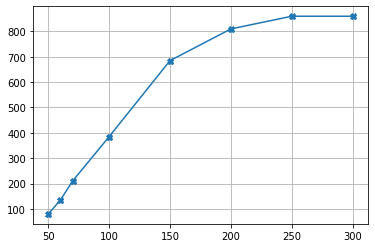

In [4]:
F=[50,60,70,100,150,200,250,300]
S=[620-540,675-540,750-540,925-540,1225-540,1350-540,1400-540,1400-540]
plt.plot(F,S,marker='X')
plt.grid()
plt.show()